# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import time
from sklearn import preprocessing

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [107]:
# %%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def update_step(self):
        old_c = self.centroids
        dists = pairwise_distances(self.X, self.centroids, metric=self.metric)
        self.lables = np.argmin(dists, axis=1)
        self.centroids = np.array(
            [self.X[self.lables == i].mean(axis=0) for i in range(self.k)])
        return np.all(old_c == self.centroids)

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        # ...
        self.X = X
        if self.init == 'random':
            mask = np.random.randint(0, X.shape[0], self.k)
            self.centroids = X[mask]

            for _ in range(self.max_iter):
                if self.update_step():
                    break

        if self.init == 'k-means':
            self.centroids[0] = self.X[np.random.randint(0, self.X.shape[0])]
            for i in range(1, self.k):
                dists = np.min(
                    pairwise_distances(
                        self.X, self.centroids[:i], self.metric),
                    axis=1) ** 2
                probs = dists / np.sum(dists)
                self.centroids[i] = self.X[np.random.choice(
                    range(self.X.shape[0]), p=probs)]

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        dists = pairwise_distances(X, self.centroids,
                                   metric=self.metric)
        return np.argmin(dists, axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size
        self.batch_ind = 0

    def update_step(self):
        old_labels = self.labels
        M = np.random.permutation(self.X.shape[0])[:self.batch_size]
        dists = pairwise_distances(self.X[M], self.centroids, self.metric)
        self.labels[M] = np.argmin(dists, axis=1)
        self.learning_rates = np.zeros(self.k)
        self.labels = self.labels.astype(int)
        for i in M:
            self.learning_rates[self.labels[i]] += 1
            lr = self.learning_rates[self.labels[i]]
            self.centroids[self.labels[i]] = (
                self.centroids[self.labels[i]]*(1.0 - 1.0 / lr)
            )
            self.centroids[self.labels[i]] = (
                self.centroids[self.labels[i]] + self.X[i] * (1.0 / lr))

        return np.all(self.centroids == self.centroids)

104:1: W391 blank line at end of file


### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

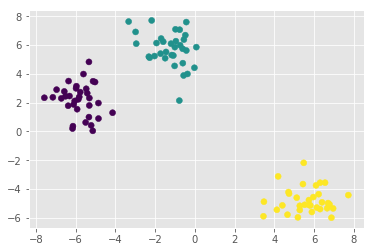

In [8]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

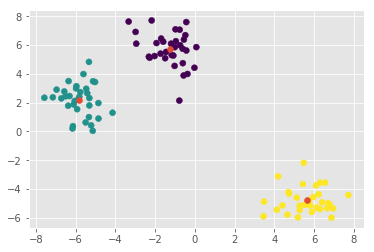

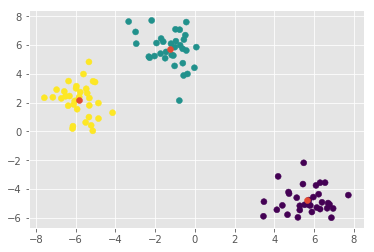

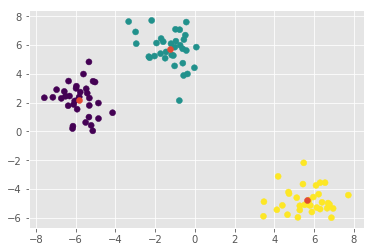

In [10]:
## Работоспособность MyKmeans
for _ in range(3):
    clf = MyKmeans(k=3).fit(X)
    prediction = clf.predict(X)
    
    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

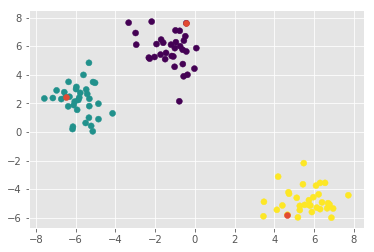

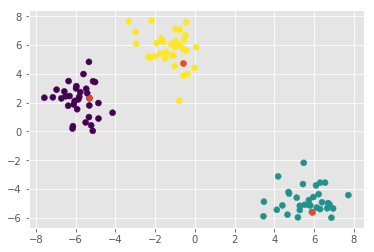

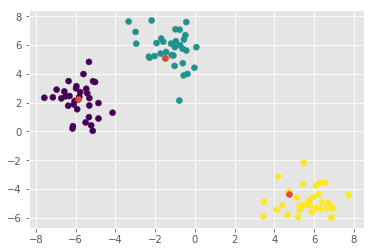

In [15]:
## Работоспособность MyKmeans++
for _ in range(3):
    clf = MyKmeans(k=3, init="k-means").fit(X)
    prediction = clf.predict(X)
    
    plt.scatter(X[:,0], X[:, 1], c=prediction)
    plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
    plt.show()

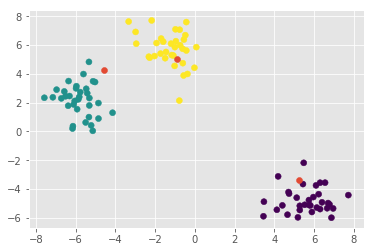

In [24]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, init="random", batch_size=10).fit(X)
prediction = clf.predict(X)
plt.scatter(X[:,0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
plt.show()

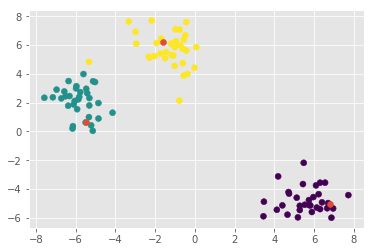

In [25]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
clf = MiniBatchKMeans(k=3, init="k-means", batch_size=10).fit(X)
prediction = clf.predict(X)
    
plt.scatter(X[:,0], X[:, 1], c=prediction)
plt.scatter(clf.centroids[:, 0], clf.centroids[:, 1])
plt.show()

In [33]:
## Время выполнения алгоритма Kmeans из sklearn
clf = KMeans(n_clusters=3, max_iter=1000, tol=0)
%time clf.fit(X)

CPU times: user 2.18 s, sys: 11.2 ms, total: 2.19 s
Wall time: 2.2 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0, verbose=0)

In [37]:
## Время выполнения алгоритма MyKmeans
my_clf = MyKmeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 1.62 ms, sys: 2.15 ms, total: 3.76 ms
Wall time: 3.29 ms


In [38]:
## Время выполнения алгоритма MyKmeans++
my_clf = MyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 1.04 ms, sys: 1.81 ms, total: 2.85 ms
Wall time: 2.69 ms


In [41]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 757 µs, sys: 1.77 ms, total: 2.53 ms
Wall time: 2.4 ms


In [42]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans
my_clf = MiniBatchKMeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 1.44 ms, sys: 2.46 ms, total: 3.9 ms
Wall time: 3.1 ms


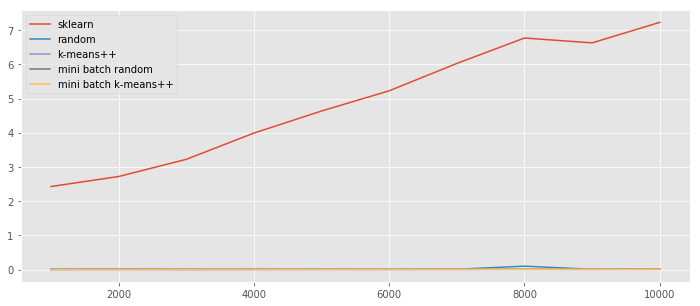

In [48]:
clf = [KMeans(n_clusters=3, max_iter=1000, tol=0),
        MyKmeans(k=3, init='random'),
        MyKmeans(k=3, init='k-means'),
        MiniBatchKMeans(k=3, init='random'),
        MiniBatchKMeans(k=3, init='k-means')]

clf_label = ['sklearn', 'random', 'k-means++', 
             'mini batch random', 'mini batch k-means++']

time_clf = [[], [], [], [], []]
x = []

for n_samples in range(1000, 10001, 1000):
    X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
    x.append(n_samples)
    for i in range(len(clf)):
        t = time.time()
        clf[i].fit(X)
        time_clf[i].append(time.time() - t)
for i in range(len(clf)):
    plt.plot(x, time_clf[i], label=clf_label[i])
plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [49]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [51]:
df = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')
scaler = preprocessing.StandardScaler()
scaler.fit_transform(df)

/Users/kosov/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kosov/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ..., 
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [74]:
#MyKMeans
def info(clf, N=5):
    res = clf.predict(df)
    keys = df.columns
    unique, counts = np.unique(res, return_counts=True)
    for c_i in range(clf.centroids.shape[0]):
        print(f'{counts[c_i]} students')
        indices = np.argpartition(-clf.centroids[c_i], 5)[:5]
        print(list(keys[indices]))
        print()

In [93]:
clf = MyKmeans(k=9, init='random')
clf.fit(df.values)
info(clf)

1493 students
['sex', 'rock', 'hair', 'music', 'kissed']

3159 students
['shopping', 'basketball', 'church', 'cute', 'softball']

356 students
['jesus', 'god', 'church', 'music', 'die']

720 students
['music', 'shopping', 'soccer', 'basketball', 'football']

849 students
['marching', 'band', 'music', 'god', 'dance']

13361 students
['god', 'cute', 'shopping', 'dance', 'hair']

1095 students
['hair', 'music', 'shopping', 'dance', 'cute']

87 students
['blonde', 'music', 'kissed', 'sex', 'hair']

8880 students
['music', 'god', 'shopping', 'rock', 'dance']



In [94]:
## MyKMeans++
clf = MyKmeans(k=9, init='k-means')
clf.fit(df.values)
info(clf)

784 students
['volleyball', 'hair', 'abercrombie', 'music', 'tennis']

11739 students
['music', 'bible', 'dress', 'cheerleading', 'mall']

268 students
['band', 'drugs', 'dress', 'marching', 'hair']

14090 students
['hair', 'jesus', 'dress', 'mall', 'bible']

348 students
['hair', 'sex', 'dance', 'basketball', 'god']

345 students
['dress', 'bible', 'clothes', 'jesus', 'god']

2207 students
['dress', 'hair', 'sexy', 'hollister', 'cute']

3 students
['hair', 'basketball', 'band', 'dress', 'shopping']

216 students
['dance', 'die', 'sex', 'sports', 'god']



In [95]:
## MyKMeans с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, init='random')
clf.fit(df.values)
info(clf)

60 students
['tennis', 'shopping', 'football', 'cute', 'basketball']

129 students
['football', 'god', 'basketball', 'dance', 'death']

2145 students
['god', 'swimming', 'cute', 'abercrombie', 'shopping']

2080 students
['dance', 'music', 'band', 'rock', 'drunk']

18928 students
['hair', 'jesus', 'dress', 'mall', 'bible']

2229 students
['music', 'swimming', 'cheerleading', 'shopping', 'hair']

1262 students
['cute', 'god', 'music', 'dance', 'mall']

2778 students
['hair', 'music', 'football', 'rock', 'sports']

389 students
['baseball', 'softball', 'dance', 'music', 'cute']



In [96]:
## MyKMeans++ с MiniBatchMyKMeans
clf = MiniBatchKMeans(k=9, init='k-means')
clf.fit(df.values)
clf = MiniBatchKMeans(k=9, init='k-means')
clf.fit(df.values)
info(clf)

344 students
['dress', 'bible', 'sexy', 'tennis', 'mall']

321 students
['music', 'sex', 'sexy', 'dress', 'blonde']

15358 students
['god', 'volleyball', 'hair', 'mall', 'dress']

434 students
['cheerleading', 'abercrombie', 'band', 'marching', 'baseball']

9800 students
['bible', 'church', 'hair', 'music', 'blonde']

25 students
['church', 'football', 'hair', 'rock', 'god']

235 students
['hair', 'soccer', 'god', 'music', 'cute']

2775 students
['mall', 'shopping', 'hair', 'rock', 'bible']

708 students
['volleyball', 'cute', 'soccer', 'hot', 'softball']



In [ ]:
## Вывод


По результатам на этих данных видно, что лучше всех себя показывает Kmeans++. Minibatch и Minibatch++ показали себя значительно хуже, чем даже Kmeans, так как они по сути выделили только один кластер, слова в которых слабо друг с другом связаны. Но это плата за скорость, более того, можно подбирать параметры так, чтобы эти алгоритмы выравнялись по качеству, но тут нужно не только подбирать параметры классификатора, но и лучше представить входные данные